In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


/home/lorenz/venv_redist/lib/python3.10/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


W MnPosDef Matrix forced pos-def by adding to diagonal 0.162072


{'cvl': array([4.85443689, 0.42845851]),
 'cvr': array([1.18072257, 0.3826954 ]),
 'csl': array([0.96059275, 0.89268155]),
 'csr': array([0.96041443, 0.8844495 ]),
 'ctl': array([1.01753435, 0.02642752]),
 'FFK_decorrelated[0]': array([0.41606566, 0.9530486 ]),
 'FFK_decorrelated[1]': array([0.97354713, 0.78417367]),
 'FFK_decorrelated[2]': array([0.09538137, 1.02828097]),
 'FFK_decorrelated[3]': array([-0.00528055,  0.99410392]),
 'FFK_decorrelated[4]': array([0.25986385, 0.98009495]),
 'FFK_decorrelated[5]': array([-0.14372452,  0.99881788]),
 'FFK_decorrelated[6]': array([0.06036543, 0.99439919]),
 'FFK_decorrelated[7]': array([0.0753746 , 0.99229983]),
 'mu': array([1., 0.]),
 'stat': [[1.0084257349922492, 0.004989737463059196],
  [0.9923989509995025, 0.0038410845115838255],
  [0.9960899210946468, 0.0034939321739987372],
  [0.9982273673360574, 0.003444265291878079],
  [1.0046974868640153, 0.003379339634812739],
  [1.0018696315547495, 0.003374879443452883],
  [1.001713710807039, 0.0

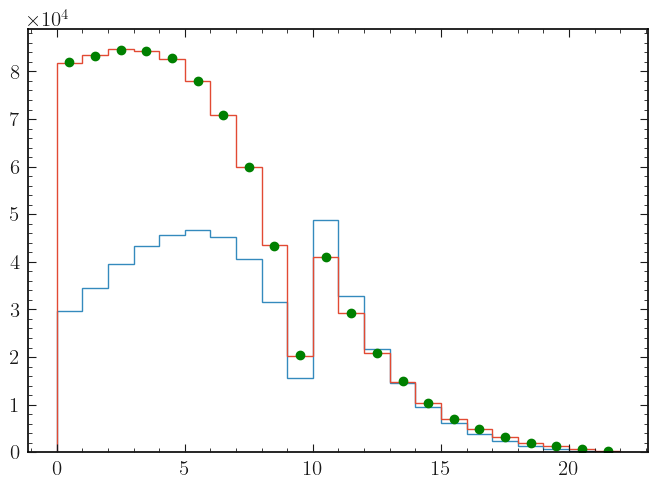

In [4]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')